In [25]:
REP_DIR = "/home/graffc/extra/fire_prediction/"
SRC_DIR = REP_DIR + 'src/'
DATA_DIR = REP_DIR + 'data/'

# --- System imports
import numpy as np
import os as os
import datetime as dt
import pytz
from matplotlib import pyplot as plt
%matplotlib inline

# --- Package imports
import helper.loaders as load
from visualization.mapping import make_map
from helper import date_util as du

plt.rcParams['figure.figsize'] = [10,12]

In [2]:
# === DATA FILES ===
land_cover_src = os.path.join(DATA_DIR, 'interim/land_cover/land_cover_alaska.pkl')
weather_proc_region_src = os.path.join(DATA_DIR, 'interim/gfs/weather_proc/4/weather_proc_gfs_4_alaska_2007-2016.pkl')

In [5]:
# === DATA LOADING ===
land_cover = load.load_pickle(land_cover_src)
weather_proc_region = load.load_pickle(weather_proc_region_src)
BOUNDING_BOX = weather_proc_region.bounding_box

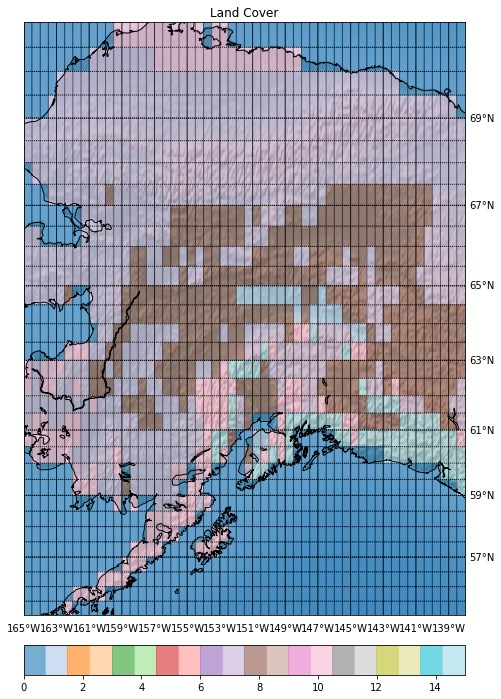

In [33]:
mp = make_map(BOUNDING_BOX)
mp.shadedrelief()

values = np.argmax(land_cover, axis=2)
lats, lons = BOUNDING_BOX.make_grid()

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.6, cmap='tab20')
cbar = mp.colorbar(cs,location='bottom',pad="5%")

_ = plt.title('Land Cover')

* 0 Water
* 1 Evergreen Needleleaf Forest
* 2 Evergreen Broadleaf Forest
* 3 Deciduous Needleleaf Forest
* 4 Deciduous Broadleaf Forest
* 5 Mixed Forests
* 6 Closed Shrublands
* 7 Open Shrublands
* 8 Woody Savannas
* 9 Savannas
* 10 Grasslands
* 11 Permanent Wetlands
* 12 Croplands
* 13 Urban and Built-Up
* 14 Cropland/Natural Vegetation Mosaic
* 15 Snow and Ice
* 16 Barren or Sparsely Vegetated

In [1]:
file_name = "/lv_scratch/scratch/graffc0/fire_prediction/data/raw/land_mcd12c1/MCD12C1.A2007001.051.2012264190141.hdf"

In [54]:
from pyhdf.SD import SD, SDC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [6]:
hdf = SD(file_name, SDC.READ)

In [16]:
data = np.array(hdf.select('Majority_Land_Cover_Type_1')[:])

In [69]:
len(colors)

18

In [59]:
def hex_to_rgb(hex_list):
    colors = []
    for h in hex_list:
        colors.append(tuple(int(h[i:i+2], 16)/256. for i in (0, 2, 4)))
        
    return colors

In [60]:
print(hex_to_rgb(colors))

[(0.6796875, 0.76171875, 0.828125), (0.08203125, 0.12890625, 0.0234375), (0.1328125, 0.31640625, 0.16015625), (0.2109375, 0.60546875, 0.27734375), (0.1875, 0.91796875, 0.35546875), (0.21875, 0.4453125, 0.2578125), (0.4140625, 0.13671875, 0.14453125), (0.76171875, 0.6640625, 0.41015625), (0.71484375, 0.375, 0.19140625), (0.84765625, 0.5625, 0.23828125), (0.56640625, 0.68359375, 0.25), (0.06640625, 0.06640625, 0.28515625), (0.80078125, 0.69921875, 0.23046875), (0.796875, 0.0, 0.07421875), (0.19921875, 0.15625, 0.05078125), (0.83984375, 0.80078125, 0.796875), (0.96484375, 0.875, 0.515625), (0.43359375, 0.43359375, 0.43359375)]


(-0.5, 414.5, 329.5, -0.5)

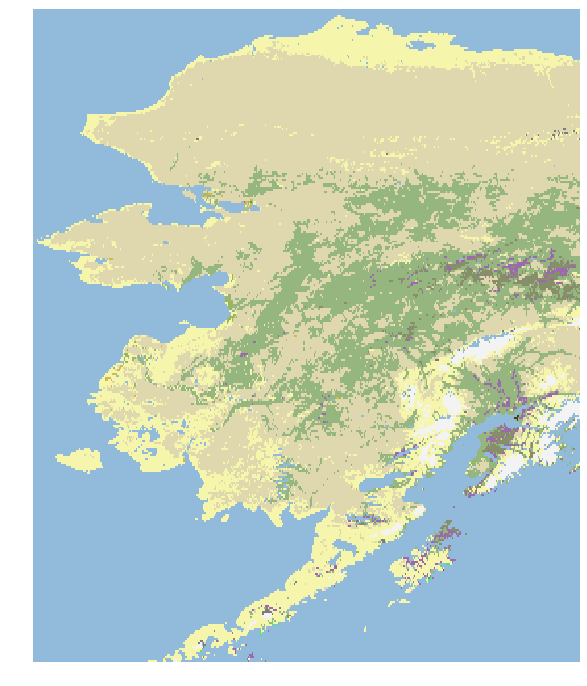

In [124]:
plt.rcParams['figure.figsize'] = [10,12]
colors = ['87b5d8', 
  '7a845b', 
          '225129',
          '369b47', 
          '30eb5b',
          '925aa6', 
  '6a2325', 
          'ddd5a7', 
          'b76031', 
          '8aaf72', 
          '91af40',  
  'f5f7a3', 
  'cdb33b', 
  'cc0013', 
  '33280d', 
  'd7cdcc', 
  'f3f3f3', 
  '6f6f6f'  ]

#colors[4] = 'ff0000'
plt.imshow(data[370:700,235:650],aspect=1.5,cmap=ListedColormap(hex_to_rgb(colors)),alpha=.9)
plt.axis('off')